# TED Talk Recommendation System

This notebook demonstrates a simple content-based recommendation system for TED Talks. We will analyze the talk descriptions to find similarities and suggest related talks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Loading and Exploration

We begin by loading the TED Talk dataset and exploring its basic characteristics.

In [5]:
df= pd.read_csv("tedx_dataset.csv")

In [6]:
df.shape

(4467, 7)

In [7]:
df.head()

,idx,main_speaker,title,details,posted,url,num_views
0,8d2005ec35280deb6a438dc87b225f89,Alexandra Auer,The intangible effects of walls,More barriers exist now than at the end of Wor...,Posted Apr 2020,https://www.ted.com/talks/alexandra_auer_the_i...,NaN
1,b3072cd11f40eb57fd259555264476c6,Elizabeth Gilbert,It's OK to feel overwhelmed. Here's what to do...,If you're feeling anxious or fearful during th...,Posted Apr 2020,https://www.ted.com/talks/elizabeth_gilbert_it...,NaN
2,4adc9fee977fa04c357ed4c9b52aa3cc,Butterscotch,"""Accept Who I Am""","Firing off her formidable beatboxing skills, m...",Posted Apr 2020,https://www.ted.com/talks/butterscotch_accept_...,0.0
3,59c641a72b495d522a7932145d6c02b3,Ethan Lisi,What it's really like to have autism,"""Autism is not a disease; it's just another wa...",Posted Apr 2020,https://www.ted.com/talks/ethan_lisi_what_it_s...,NaN
4,d227f2faf6ec185e54436d86463f499b,Daniel Finkel,Can you solve the sea monster riddle?,"According to legend, once every thousand years...",Posted Apr 2020,https://www.ted.com/talks/daniel_finkel_can_yo...,0.0


### Checking for Missing Values

It's important to identify missing data, which can affect our analysis.

In [8]:
df.isnull().sum()

idx                0
main_speaker       1
title              0
details            0
posted             0
url                0
num_views       4258
dtype: int64

### Converting Posted Date

We'll convert the 'posted' column to a datetime format for easier manipulation.

In [9]:
df['posted_date'] = pd.to_datetime(df['posted'].str.extract(r'(\w+ \d{4})')[0], format='%b %Y')


In [10]:
df.head()

,idx,main_speaker,title,details,posted,url,num_views,posted_date
0,8d2005ec35280deb6a438dc87b225f89,Alexandra Auer,The intangible effects of walls,More barriers exist now than at the end of Wor...,Posted Apr 2020,https://www.ted.com/talks/alexandra_auer_the_i...,NaN,2020-04-01
1,b3072cd11f40eb57fd259555264476c6,Elizabeth Gilbert,It's OK to feel overwhelmed. Here's what to do...,If you're feeling anxious or fearful during th...,Posted Apr 2020,https://www.ted.com/talks/elizabeth_gilbert_it...,NaN,2020-04-01
2,4adc9fee977fa04c357ed4c9b52aa3cc,Butterscotch,"""Accept Who I Am""","Firing off her formidable beatboxing skills, m...",Posted Apr 2020,https://www.ted.com/talks/butterscotch_accept_...,0.0,2020-04-01
3,59c641a72b495d522a7932145d6c02b3,Ethan Lisi,What it's really like to have autism,"""Autism is not a disease; it's just another wa...",Posted Apr 2020,https://www.ted.com/talks/ethan_lisi_what_it_s...,NaN,2020-04-01
4,d227f2faf6ec185e54436d86463f499b,Daniel Finkel,Can you solve the sea monster riddle?,"According to legend, once every thousand years...",Posted Apr 2020,https://www.ted.com/talks/daniel_finkel_can_yo...,0.0,2020-04-01


In [11]:
df['posted_date'] = df['posted_date'].dt.strftime('%m-%Y')

In [12]:
df.head()

,idx,main_speaker,title,details,posted,url,num_views,posted_date
0,8d2005ec35280deb6a438dc87b225f89,Alexandra Auer,The intangible effects of walls,More barriers exist now than at the end of Wor...,Posted Apr 2020,https://www.ted.com/talks/alexandra_auer_the_i...,NaN,04-2020
1,b3072cd11f40eb57fd259555264476c6,Elizabeth Gilbert,It's OK to feel overwhelmed. Here's what to do...,If you're feeling anxious or fearful during th...,Posted Apr 2020,https://www.ted.com/talks/elizabeth_gilbert_it...,NaN,04-2020
2,4adc9fee977fa04c357ed4c9b52aa3cc,Butterscotch,"""Accept Who I Am""","Firing off her formidable beatboxing skills, m...",Posted Apr 2020,https://www.ted.com/talks/butterscotch_accept_...,0.0,04-2020
3,59c641a72b495d522a7932145d6c02b3,Ethan Lisi,What it's really like to have autism,"""Autism is not a disease; it's just another wa...",Posted Apr 2020,https://www.ted.com/talks/ethan_lisi_what_it_s...,NaN,04-2020
4,d227f2faf6ec185e54436d86463f499b,Daniel Finkel,Can you solve the sea monster riddle?,"According to legend, once every thousand years...",Posted Apr 2020,https://www.ted.com/talks/daniel_finkel_can_yo...,0.0,04-2020


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4467 entries, 0 to 4466
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   idx           4467 non-null   object 
 1   main_speaker  4466 non-null   object 
 2   title         4467 non-null   object 
 3   details       4467 non-null   object 
 4   posted        4467 non-null   object 
 5   url           4467 non-null   object 
 6   num_views     209 non-null    float64
 7   posted_date   4467 non-null   object 
dtypes: float64(1), object(7)
memory usage: 279.3+ KB


### Formatting Posted Date

Here, we reformat the posted date.

In [14]:
df['month'] = df['posted'].str.extract(r'Posted (\w+) \d{4}')[0]  # Extracts the month name
df['year'] = df['posted'].str.extract(r'Posted \w+ (\d{4})')[0]   # Extracts the year

### DataFrame Information

Let's examine the structure and data types of our DataFrame.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4467 entries, 0 to 4466
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   idx           4467 non-null   object 
 1   main_speaker  4466 non-null   object 
 2   title         4467 non-null   object 
 3   details       4467 non-null   object 
 4   posted        4467 non-null   object 
 5   url           4467 non-null   object 
 6   num_views     209 non-null    float64
 7   posted_date   4467 non-null   object 
 8   month         4467 non-null   object 
 9   year          4467 non-null   object 
dtypes: float64(1), object(9)
memory usage: 349.1+ KB


### Visualizing Year Counts

This bar chart shows the distribution of TED Talks over the years.

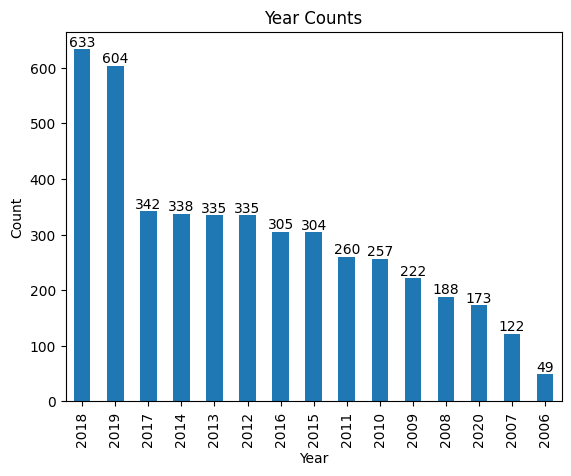

In [26]:
ax=df['year'].value_counts().plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Setting titles and labels
plt.title('Year Counts')
plt.xlabel('Year')
plt.ylabel('Count')

# Display the plot
plt.show()


## Combining Title and Details

To have a more complete text representation of each talk, we combine the 'title' and 'details' columns.

In [27]:
# Let's combine the title and the details of the talk.
df['details'] = df['title'] + ' ' + df['details']

In [28]:
df = df[['main_speaker', 'details']]
df.dropna(inplace = True)
df.head()

,main_speaker,details
0,Alexandra Auer,The intangible effects of walls More barriers ...
1,Elizabeth Gilbert,It's OK to feel overwhelmed. Here's what to do...
2,Butterscotch,"""Accept Who I Am"" Firing off her formidable be..."
3,Ethan Lisi,"What it's really like to have autism ""Autism i..."
4,Daniel Finkel,Can you solve the sea monster riddle? Accordin...


In [29]:
data = df.copy()

### Text Preprocessing

We'll now preprocess the text data by removing punctuation and stop words to prepare it for analysis.

In [16]:
import nltk
import string
import warnings

In [18]:
nltk.download('stopwords')
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
from nltk.corpus import stopwords

In [37]:
def remove_STWORDS(text):
    stop_words = stopwords.words('english')
    imp_words =[]
    for word in str(text).split():
        word=word.lower()
        if word not in stop_words:
            imp_words.append(word)
    output = " ".join(imp_words)
    return output
    

In [38]:
df['details'] = df['details'].apply(lambda text: remove_STWORDS(text))

In [39]:
df.head()

,main_speaker,details
0,Alexandra Auer,intangible effects walls barriers exist end wo...
1,Elizabeth Gilbert,ok feel overwhelmed. here's next feeling anxio...
2,Butterscotch,"""accept am"" firing formidable beatboxing skill..."
3,Ethan Lisi,"really like autism ""autism disease; another wa..."
4,Daniel Finkel,"solve sea monster riddle? according legend, ev..."


In [68]:
punctuations_list = string.punctuation


def cleaning_punctuations(text):
    signal = str.maketrans('', '', punctuations_list)
    return text.translate(signal)


df['details'] = df['details'].apply(lambda x: cleaning_punctuations(x))
df.head()

,main_speaker,details
0,Alexandra Auer,intangible effects walls barriers exist end wo...
1,Elizabeth Gilbert,ok feel overwhelmed heres next feeling anxious...
2,Butterscotch,accept am firing formidable beatboxing skills ...
3,Ethan Lisi,really like autism autism disease another way ...
4,Daniel Finkel,solve sea monster riddle according legend ever...


### Generating a Word Cloud

A word cloud provides a visual overview of the most frequent words in our TED Talk descriptions.

In [40]:
details_corpus = " ".join(df['details'])

In [41]:
from wordcloud import WordCloud

In [46]:
wc = WordCloud( width=1200,
               height=600).generate(details_corpus)

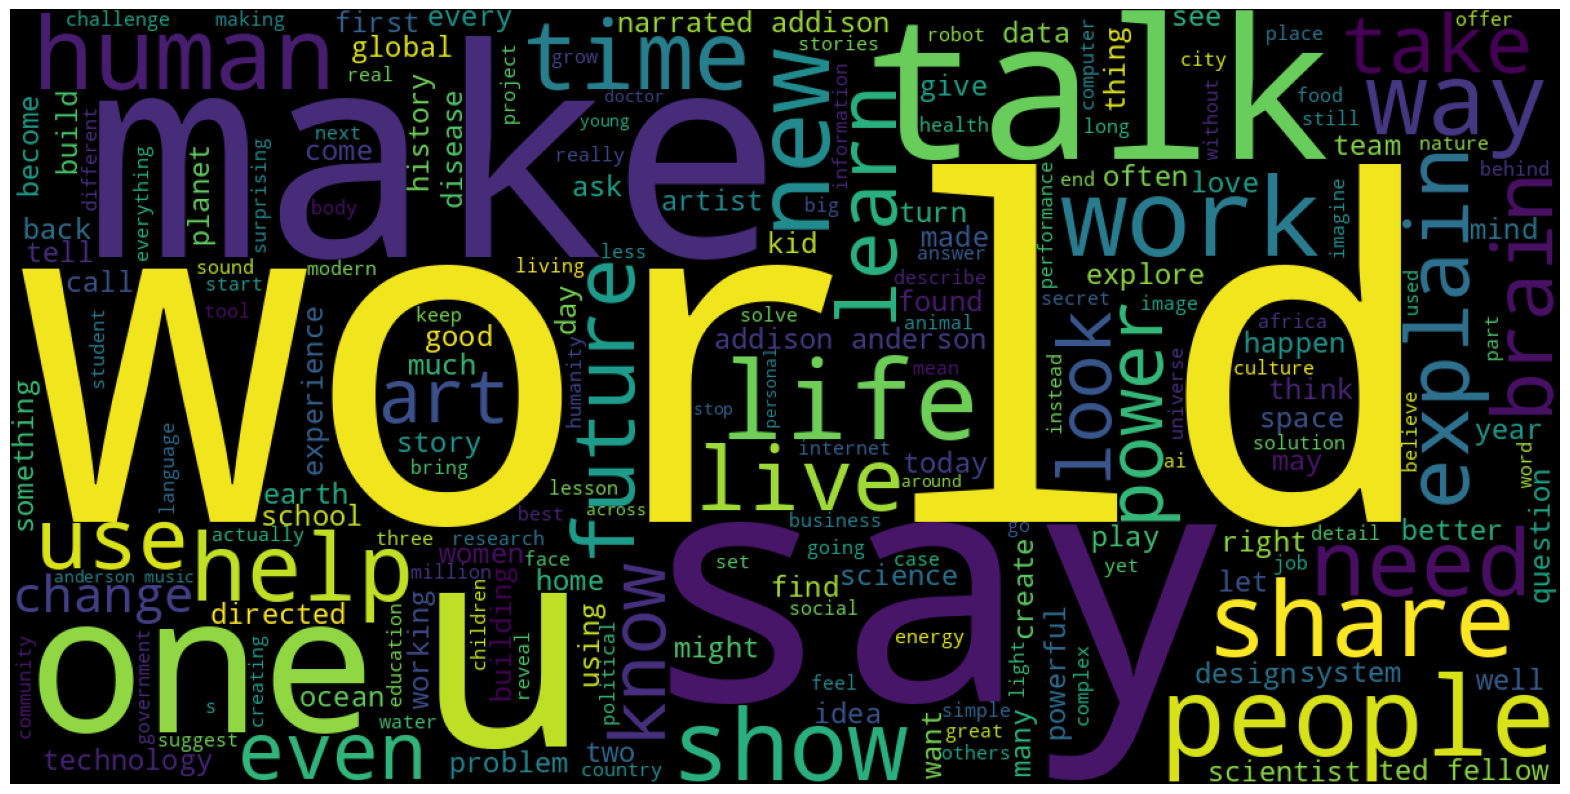

In [48]:
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(wc)
plt.show()

## Recommendation System: TF-IDF Vectorization

We use TF-IDF to convert the text into numerical vectors, which can then be used to calculate similarity.

In [49]:
from scipy.stats import pearsonr
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [52]:
%%capture
vectorizer = TfidfVectorizer(analyzer = 'word')
vectorizer.fit(df['details'])

### Similarity Calculation

The following function calculates cosine similarity and Pearson correlation between TED Talk descriptions.

In [69]:
def get_similarities(talk_content, data=df):

    # Getting vector for the input talk_content.
    talk_array1 = vectorizer.transform(talk_content).toarray()

    # We will store similarity for each row of the dataset.
    sim = []
    pea = []
    for idx, row in data.iterrows():
        details = row['details']

        # Getting vector for current talk.
        talk_array2 = vectorizer.transform(
            data[data['details'] == details]['details']).toarray()

        # Calculating cosine similarities
        cos_sim = cosine_similarity(talk_array1, talk_array2)[0][0]

        # Calculating pearson correlation
        pea_sim = pearsonr(talk_array1.squeeze(), talk_array2.squeeze())[0]

        sim.append(cos_sim)
        pea.append(pea_sim)

    return sim, pea

In [70]:
def recommend_talks(talk_content, data=data):

    data['cos_sim'], data['pea_sim'] = get_similarities(talk_content)

    data.sort_values(by=['cos_sim', 'pea_sim'], ascending=[
                     False, False], inplace=True)

    display(data[['main_speaker', 'details']].head())

## Generating Recommendations

The `recommend_talks` function takes an input and displays the top 5 most similar TED Talks.

### Example Recommendations:

In [71]:
talk_content = ['Time Management and working\
hard to become successful in life']
recommend_talks(talk_content)

,main_speaker,details
1359,Emilie Weight,3 things I learned from my intellectually disa...
2054,Aomawa Shields,How we'll find life on other planets Astronome...
740,Iseult Gillespie,The myth of Pandora's box Pandora was the firs...
2880,K. Erica Dodge,Gyotaku: The ancient Japanese art of printing ...
2461,Nancy Kanwisher,A neural portrait of the human mind Brain imag...


In [72]:
talk_content = ['Climate change and impact on the health\
. How can we change this world by reducing carbon footprints?']
recommend_talks(talk_content)

,main_speaker,details
2327,Guy Winch,Why we all need to practice emotional first ai...
4421,Peter Gabriel,Fight injustice with raw video Musician and ac...
2131,Tea Uglow,An Internet without screens might look like th...
1730,Deeyah Khan,What we don't know about Europe's Muslim kids ...
820,Gabby Rivera,The story of Marvel's first queer Latina super...


In [73]:
talk_content =  ['metal health and impact on day to day life\. ']
recommend_talks(talk_content)

,main_speaker,details
3627,Lesley Hazleton,On reading the Koran Lesley Hazleton sat down ...
3026,Jarrett J. Krosoczka,How a boy became an artist This talk paints th...
1069,Dan Knights,How we study the microbes living in your gut T...
1973,Linus Torvalds,The mind behind Linux Linus Torvalds transform...
2804,May El-Khalil,Making peace is a marathon In Lebanon there is...
